In [77]:
from sklearn.neural_network import MLPRegressor
from neupy import algorithms,layers,environment,init
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

environment.reproducible()

Populating the interactive namespace from numpy and matplotlib


In [62]:
# y -> outlet liquid temperature
# q(t) -> liquid flow rate
# Narx -> yhat(t+1|t) = f(y(t) ... y(t-3) u(t) ... u(t-9))

#read data
data = open('../exchanger/exchanger.dat')
lst = []
for line in data:
    lst += [line.split()]
time = [float(x[0]) for x in lst]
u = [float(x[1]) for x in lst]
y = [float(x[2]) for x in lst]

In [63]:
#divide identification set and validation set
ID_LENGHT = 3000
VAL_LENGHT = 1000
time_id = time[:ID_LENGHT]
u_id = u[:ID_LENGHT]
y_id = y[:ID_LENGHT]
avg_y_id = np.mean(y_id)
avg_u_id = np.mean(u_id)

time_val = time[ID_LENGHT:]
u_val = u[ID_LENGHT:]
y_val = y[ID_LENGHT:]
avg_y_val = np.mean(y_val)
avg_u_val = np.mean(u_val)

AR_deg = 4
X_deg = 10

In [71]:
net = algorithms.MinibatchGradientDescent(
        connection = [
            layers.Input(AR_deg + X_deg),
            layers.Sigmoid(14 , weight = 0),
            layers.Sigmoid(7, weight = 0),
            layers.Sigmoid(1, weight = 0)
        ],
        batch_size = 1,
        verbose = True)

Y = np.array(y_id)
reg_u = np.full(X_deg,avg_u_id)
reg_y = np.full(AR_deg,avg_y_id)
PHI = []
for i in range(ID_LENGHT):
    if i!=0:
        reg_y = np.append(reg_y, Y[i])[1:]
        reg_u = np.append(reg_u, u_id[i])[1:]
    regressors = np.append(reg_u, reg_y)
    PHI.append(regressors)
PHI = np.array(PHI)


Main information

[ALGORITHM] MinibatchGradientDescent

[OPTION] batch_size = 1
[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.37 seconds


In [72]:
Y_val = np.array(y_val)
reg_u = np.full(X_deg,avg_u_val)
reg_y = np.full(AR_deg,avg_y_val)
PHI_val = []
for i in tqdm(range(VAL_LENGHT)):  
    if i!=0:
        reg_y = np.append(reg_y, Y_val[i])[1:]
        reg_u = np.append(reg_u, u_val[i])[1:]
    regressors = np.append(reg_u, reg_y)
    PHI_val.append(regressors)
PHI_val = np.array(PHI_val)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 35721.13it/s]


In [73]:
net.train(PHI, Y, PHI_val, Y_val)


Start training

[TRAINING DATA] shapes: (3000, 14)
[TEST DATA] shapes: (1000, 14)
[TRAINING] Total epochs: 100

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 9257      | 9056      | 5.6 sec    |                                       
| 2       | 9257      | 9056      | 5.6 sec    |                                       
| 3       | 9257      | 9056      | 5.6 sec    |                                       
| 4       | 9257      | 9056      | 5.6 sec    |                                       
| 5       | 9257      | 9056      | 5.7 sec    |                                       
| 6       | 9257      | 9056      | 5.6 sec    |                                       
| 7       | 9257      | 9056      | 5.6 sec    |                                       
| 8       | 9257      | 9056      | 5.6 sec    |                                       
| 9       | 9257      | 9056      | 

| 91      | 9257      | 9056      | 5.5 sec    |                                       
| 92      | 9257      | 9056      | 6.6 sec    |                                       
| 93      | 9257      | 9056      | 7.0 sec    |                                       
| 94      | 9257      | 9056      | 6.6 sec    |                                       
| 95      | 9257      | 9056      | 6.4 sec    |                                       
| 96      | 9257      | 9056      | 5.6 sec    |                                       
| 97      | 9257      | 9056      | 5.6 sec    |                                       
| 98      | 9257      | 9056      | 5.5 sec    |                                       
| 99      | 9257      | 9056      | 5.6 sec    |                                       
| 100     | 9257      | 9056      | 5.5 sec    |                                       
------------------------------------------------



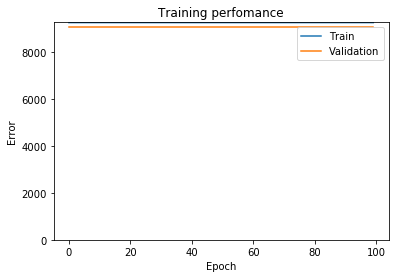

In [74]:
from neupy import plots
plots.error_plot(net)

In [75]:
y_hat  = net.predict(PHI)

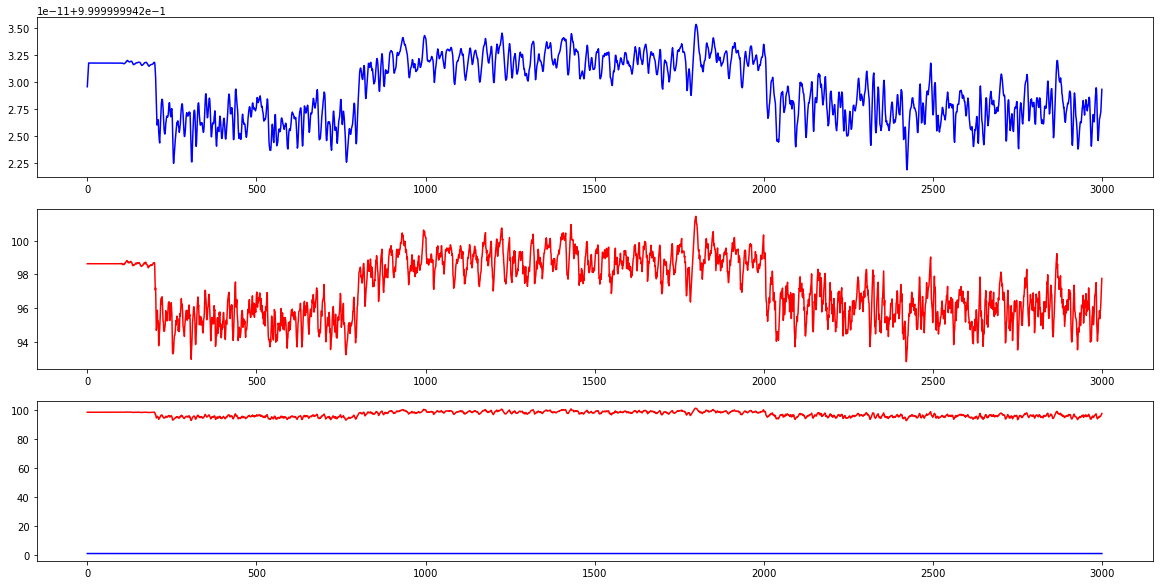

MSE on identification:  9256.71900227


In [78]:
from sklearn.metrics import mean_squared_error
plt.subplot(311)
plt.plot(y_hat, color='blue')
plt.subplot(312)
plt.plot(y_id, color='red')
plt.subplot(313)
plt.plot(y_hat, color='blue')
plt.plot(y_id, color='red')
plt.show()

MSE_id = mean_squared_error(y_hat,y_id)
print("MSE on identification: ", MSE_id)

In [60]:
plots.layer_structure(net)

RuntimeError: failed to execute ['dot', '-Tpdf', '-O', 'C:\\Users\\Matteo\\AppData\\Local\\Temp\\tmp2q_s70bl'], make sure the Graphviz executables are on your systems' path

In [84]:
net.

Sigmoid(1)